In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
%cd "C:\DSBA\Applied ML\Datathon"

C:\DSBA\Applied ML\Datathon


In [3]:
train=pd.read_csv('training_v2.csv')
train.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [4]:
test = pd.read_csv("unlabeled.csv")
test.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,7,101458,86,NaN,66.0,32.518596,1,African American,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
3,8,48067,163,NaN,64.0,20.798520,0,Caucasian,M,182.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory
4,10,25865,59,NaN,56.0,NaN,0,Caucasian,M,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [5]:
train['train'] = 1
test['train']= 0
df = pd.concat([train,test])

In [6]:
##Take selected columns from excel
df_dict=pd.read_excel('C:\DSBA\Applied ML\Datathon\Dictionary_ver_1.0.xlsx',sheet_name='Col_list')
df=df[df_dict['Green'].tolist()]
df.head(10)

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,train
0,66154,118,25312,0.0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,1
1,114252,81,59342,0.0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,1
2,119783,118,50777,0.0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,1
3,79267,118,46918,0.0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1
4,92056,33,34377,0.0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,1
5,33181,83,74489,0.0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,1
6,82208,83,49526,0.0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,1
7,120995,33,50129,0.0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,1
8,80471,118,10577,1.0,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1
9,42871,118,90749,0.0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1


In [7]:
df.isnull().sum().sort_values(ascending=False)

bilirubin_apache         83426
albumin_apache           79029
urineoutput_apache       64037
hospital_death           39308
wbc_apache               30342
                         ...  
icu_type                     0
pre_icu_los_days             0
readmission_status           0
apache_post_operative        0
encounter_id                 0
Length: 115, dtype: int64

In [8]:
df.shape

(131021, 115)

In [26]:
##Create dummy variable

cat_var = ['ethnicity', 'gender', 'icu_admit_source','icu_stay_type', 'icu_type', 'apache_3j_bodysystem','apache_2_bodysystem']
num_var=[]
for ls in df.columns:
    if ls not in cat_var:
        num_var.append(ls)
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,train
0,0,1,0,0,0,1,1,0,0,0,...,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,0,1,0,0,0,...,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0,1,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,1,0,0,0,0,0,1,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1,0,0,0,1,0,0,0,0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
#new_df.to_csv('before_impute.csv')

In [22]:
##Random forest impute

new_df.set_index(["encounter_id","hospital_id","patient_id","train"],inplace=True)

missing_var=list(new_df.columns[new_df.isnull().sum()>0])
independent_var = list(new_df.columns[new_df.isnull().sum()==0])#list(new_df.columns)

for ls in ['hospital_death','bilirubin_apache','albumin_apache','urineoutput_apache']:
    missing_var.remove(ls)


for ls in missing_var:
#if new_df[ls].isnull().sum() > 0:
    df_with_var_train = new_df[(pd.isnull(new_df[ls]) == False)]
    df_with_var_train=df_with_var_train[df_with_var_train.index.get_level_values('train') == 1]
    
    df_with_var_test = new_df[(pd.isnull(new_df[ls]) == False)]
    df_with_var_test=df_with_var_test[df_with_var_test.index.get_level_values('train') == 0]
    
    df_without_var_train = new_df[pd.isnull(new_df[ls])]
    df_without_var_train=df_without_var_train[df_without_var_train.index.get_level_values('train') == 1]
    
    df_without_var_test = new_df[pd.isnull(new_df[ls])]
    df_without_var_test=df_without_var_test[df_without_var_test.index.get_level_values('train') == 0]
    #independent_var.remove(ls)

    rfimpute = RandomForestRegressor()
    rfimpute.fit(df_with_var_train[independent_var], df_with_var_train[ls])

    generatedvarValues_train = rfimpute.predict(X=df_without_var_train[independent_var])
    generatedvarValues_test = rfimpute.predict(X=df_without_var_test[independent_var])
    
    df_without_var_train[ls] = generatedvarValues_train.astype(new_df[ls].dtype)
    data_train = df_with_var_train.append(df_without_var_train)
    
    df_without_var_test[ls] = generatedvarValues_test.astype(new_df[ls].dtype)
    data_test=df_with_var_test.append(df_without_var_test)
    
    data=data_train.append(data_test)
    new_df=data.copy() #do not remove this line (otherwise only last variable will be imputed)

data.reset_index(inplace=True)
#data.drop('index', inplace=True, axis=1)

    #new_df=data.copy()

In [23]:
data.shape

(131021, 146)

In [24]:
data.isnull().sum().sort_values(ascending=False)

bilirubin_apache             83426
albumin_apache               79029
urineoutput_apache           64037
hospital_death               39308
height                           0
                             ...  
h1_diasbp_noninvasive_max        0
h1_diasbp_min                    0
h1_diasbp_max                    0
d1_temp_min                      0
encounter_id                     0
Length: 146, dtype: int64

In [ ]:
#Read from the imputed data saved earlier

In [129]:
data=pd.read_csv('impute_check.csv')
data.head()

,Unnamed: 0,encounter_id,hospital_id,patient_id,train,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,66154,118,25312,1,0,1,0,0,0,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,114252,81,59342,1,0,1,0,0,0,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,33181,83,74489,1,0,1,0,0,0,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,42871,118,90749,1,0,0,0,0,0,...,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,22471,118,112115,1,0,0,1,0,0,...,0.11,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [31]:
#data.corr().to_csv('Progress3_corr.csv')

In [131]:
##Remove correlated features

# Create positive correlation matrix
corr_df = data[data['train']==1].corr().abs()
# Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# Find columns that meet treshold
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]
print(to_drop)

['icu_admit_source_Operating Room / Recovery', 'apache_3j_bodysystem_Gastrointestinal', 'apache_3j_bodysystem_Genitourinary', 'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic', 'apache_3j_bodysystem_Neurological', 'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Trauma', 'elective_surgery', 'bun_apache', 'creatinine_apache', 'hematocrit_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_sysbp_max', 'd1_sysbp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_bun_max', 'd1_creatinine_max', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_platelets_max', 'd1_wbc_max']


In [132]:
# Drop those columns
reduced_df = data.drop(to_drop, axis=1)
reduced_df.shape

(131021, 114)

In [133]:
reduced_df.isnull().sum().sort_values(ascending=False)

bilirubin_apache          83426
albumin_apache            79029
urineoutput_apache        64037
hospital_death            39308
weight                        0
                          ...  
h1_mbp_noninvasive_max        0
h1_mbp_noninvasive_min        0
h1_resprate_max               0
h1_resprate_min               0
encounter_id                  0
Length: 114, dtype: int64

In [134]:
##Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for ls in reduced_df.columns:
    if ls not in ["encounter_id","hospital_id","patient_id","train","hospital_death"]:
        if (reduced_df.loc[reduced_df['train']==1,ls].max()>5) & (reduced_df.loc[reduced_df['train']==1,ls].min()<-5):
            scaler.fit(reduced_df.loc[reduced_df['train']==1,[ls]])
            reduced_df.loc[reduced_df['train']==1,[ls]] = scaler.transform(reduced_df.loc[reduced_df['train']==1,[ls]])
            reduced_df.loc[reduced_df['train']==0,[ls]] = scaler.transform(reduced_df.loc[reduced_df['train']==0,[ls]])
        
        

Text(0, 0.5, 'Frequency')

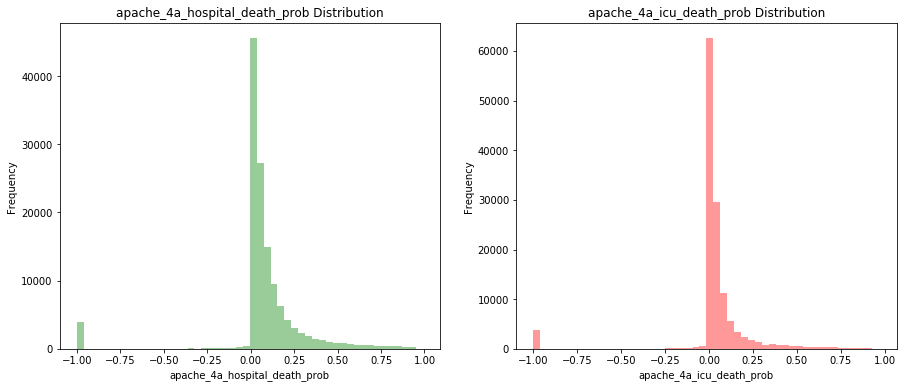

In [9]:
#Check distribution of two most important variales

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

# albumin
sns.distplot(reduced_df.apache_4a_hospital_death_prob, kde=False, color="g", ax=axes[0]).set_title('apache_4a_hospital_death_prob Distribution')
axes[0].set_ylabel('Frequency')

# bilirubin
sns.distplot(reduced_df.apache_4a_icu_death_prob, kde=False, color="r", ax=axes[1]).set_title('apache_4a_icu_death_prob Distribution')
axes[1].set_ylabel('Frequency')

In [29]:
reduced_df.apache_4a_hospital_death_prob.skew(),reduced_df.apache_4a_icu_death_prob.skew(),

(-1.6310899369578657, -2.137347390352591)

In [135]:
#reduced_df['binned_death_prob']=[-1 if x<0.4 else 0 if xfor x in reduced_df.apache_4a_hospital_death_prob]
bins = [-1.1, 0.4, 0.6, 1]
labels =[-1,0,1]
reduced_df['binned_death_prob'] = pd.cut(reduced_df['apache_4a_icu_death_prob'], bins,labels=labels)
reduced_df[['apache_4a_icu_death_prob','binned_death_prob']]

,apache_4a_icu_death_prob,binned_death_prob
0,0.0500,-1
1,0.2900,-1
2,0.0200,-1
3,0.0100,-1
4,0.0600,-1
...,...,...
131016,-0.5811,-1
131017,-0.6152,-1
131018,-0.4910,-1
131019,-1.0000,-1


In [18]:
reduced_df.apache_4a_hospital_death_prob.skew(),reduced_df.apache_4a_icu_death_prob.skew()

(-1.6310899369578657, -2.137347390352591)

In [136]:
#normalize (to reduce skewness)
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()

for ls in reduced_df.columns:
    if ls not in ["encounter_id","hospital_id","patient_id","train","hospital_death",'binned_death_prob']:#'apache_4a_hospital_death_prob','apache_4a_icu_death_prob'
        if (reduced_df.loc[reduced_df['train']==1,ls].skew()<-1)|(reduced_df.loc[reduced_df['train']==1,ls].min()>1):
            log.fit(reduced_df.loc[reduced_df['train']==1,[ls]])
            reduced_df.loc[reduced_df['train']==1,[ls]] = log.transform(reduced_df.loc[reduced_df['train']==1,[ls]])
            reduced_df.loc[reduced_df['train']==0,[ls]] = log.transform(reduced_df.loc[reduced_df['train']==0,[ls]])


In [137]:
reduced_df.isnull().sum().sort_values(ascending=False)

bilirubin_apache          83426
albumin_apache            79029
urineoutput_apache        64037
hospital_death            39308
binned_death_prob             0
                          ...  
h1_mbp_noninvasive_min        0
h1_resprate_max               0
h1_resprate_min               0
h1_spo2_max                   0
encounter_id                  0
Length: 115, dtype: int64

In [138]:
reduced_df.drop(['bilirubin_apache','albumin_apache','urineoutput_apache'],inplace=True,axis=1)

In [123]:
# col_name=[]
# reduced_df1 = pd.get_dummies(reduced_df['binned_death_prob'], drop_first=True,prefix='binned_death_prob')
# reduced_df = pd.concat([reduced_df,reduced_df1], axis=1)

# reduced_df

,encounter_id,hospital_id,patient_id,train,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,binned_death_prob,binned_death_prob_0,binned_death_prob_1
0,66154,118,25312,1,0,0.545442,0,0,0,1,...,0.00,1.000000,0.0,0.00,0.00,0.00,0.00,-1,0,0
1,114252,81,59342,1,0,0.545442,0,0,0,0,...,0.00,1.000000,0.0,0.00,0.00,0.00,0.00,0,1,0
2,33181,83,74489,1,0,0.545442,0,0,0,1,...,0.00,1.000000,0.0,0.00,0.00,0.00,0.00,-1,0,0
3,42871,118,90749,1,0,-1.833375,0,0,0,1,...,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,-1,0,0
4,22471,118,112115,1,0,-1.833375,1,0,0,1,...,0.00,0.000000,0.0,0.00,0.00,0.00,0.00,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131016,79031,11,40252,0,0,0.545442,0,0,0,0,...,0.00,0.410000,0.0,0.06,0.01,0.01,0.00,-1,0,0
131017,119601,1,53076,0,0,0.545442,0,0,0,1,...,0.00,0.310000,0.0,0.00,0.00,0.00,0.00,-1,0,0
131018,44259,110,74621,0,0,0.545442,0,0,0,0,...,0.01,0.250000,0.0,0.00,0.03,0.01,0.00,-1,0,0
131019,31368,144,46515,0,0,0.545442,0,0,0,1,...,0.00,0.273142,0.0,0.00,0.00,0.00,0.02,-1,0,0


In [139]:
reduced_df.drop(['binned_death_prob'],inplace=True,axis=1)

In [140]:
##Create test train
from xgboost import XGBClassifier

# Create the X and y set
from sklearn.model_selection import train_test_split

train=reduced_df[reduced_df['train']==1]
#train.drop(["encounter_id","hospital_id","patient_id"],inplace=True,axis=1)

col_list=list(train.columns)

for ls in ["encounter_id","hospital_id","patient_id",'hospital_death','train']:
    #try:
        col_list.remove(ls)
    #except:
    #    print(ls)
    #    break
    #    pass

X=train[col_list]
y=train['hospital_death']
X_train = X.iloc[:,:]
y_train = y.iloc[:]


In [58]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (91713, 106) (91713,)
Upsampled shape: (167596, 106) (167596,)
SMOTE sample shape: (167596, 106) (167596,)
Downsampled shape: (15830, 106) (15830,)


In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(XGBClassifier(), methods_data[method][0], methods_data[method][1], cv=10, scoring='roc_auc')
    print(f"The best roc_auc Score for {method} data:")
    print (lr_results.mean())

The best roc_auc Score for Original data:
0.883253735431518
The best roc_auc Score for Upsampled data:
0.9541790339177973
The best roc_auc Score for SMOTE data:
0.981322664260224
The best roc_auc Score for Downsampled data:
0.8682024096847105


In [60]:
lr = XGBClassifier()

# Fit the model to the data
lr = lr.fit(x_train_sm, y_train_sm)

#print ("\n\n ---XGBoost Model---")
#lr.predict(X_test)

In [141]:
X_test=reduced_df[reduced_df['train']==0]
col_list=list(X_test.columns)
for ls in ['encounter_id',"hospital_id","patient_id",'hospital_death','train']:
    col_list.remove(ls)
X_test=X_test[col_list]
#X_test.drop('train',inplace=True,axis=1)
X_test=X_test.iloc[:]

In [83]:
df_pred=pd.DataFrame(data=lr.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.0(smote xgboost).csv')
#df_pred.to_csv('Prog3_ver1.0(smote xgboost).csv')

**Try grid search**

In [87]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
#X, y = housing_data[housing_data.columns.tolist()[:-1]],
#housing_data[housing_data.columns.tolist()[-1]
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
'n_estimators': [200],
'subsample': [0.3, 0.5, 0.9]}
gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(objective='binary:logistic',estimator=gbm,param_grid=gbm_param_grid,
scoring='roc_auc', cv=5, verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 41.6min finished


Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}
Best ROC found:  0.9439629727160211


In [ ]:
'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9

In [88]:
lr1 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr1 = lr1.fit(X_train, y_train)

In [89]:
df_pred=pd.DataFrame(data=lr1.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.1(grid xgboost).csv')

**Trail 2**

In [98]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.8, 0.9],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)                
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=XGBClassifier(objective= 'binary:logistic',learning_rate=0.1,n_estimators=200),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 77.9min finished


Best parameters found:  {'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}
Best ROC found:  0.944820210310564


In [99]:
lr2 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr2 = lr2.fit(X_train, y_train)

In [100]:
df_pred=pd.DataFrame(data=lr2.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.2(grid xgboost).csv')

**Trail 3**

In [110]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.9,1],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
  'learning_rate':[0.1,0.05],
 'n_estimators':[200,300]   
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=XGBClassifier(objective= 'binary:logistic'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 973.5min finished


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9}
Best ROC found:  0.9452361957266902


In [144]:
lr3 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr3 = lr3.fit(X_train, y_train)

In [145]:
df_pred=pd.DataFrame(data=lr3.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.4(local grid xgboost).csv')

**Try using GPU**

In [118]:
from sklearn.pipeline import Pipeline
from numba import jit, cuda

In [146]:
@jit
def try_gpu():
    pipe1=Pipeline(steps=[('clf',XGBClassifier(objective= 'binary:logistic'))])#max_bin=16,predictor='gpu_predictor',tree_method='gpu_exact',nthread=1,n_gpus=1
                                                    

    search_space=[{'clf__n_estimators': [100,150, 200, 300], 
                   'clf__max_depth': [4,6,9],
                   'clf__learning_rate': [0.1, 0.01, 0.05],
                   'clf__random_state': [0],
                   'clf__subsample': [0.7,0.9,1], 
                   'clf__colsamplebytree': [1.0, 0.9, 0.8]}] 

    grid_cpu=GridSearchCV(estimator=pipe1, param_grid=search_space, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1,
    refit="AUC",verbose=1)
    grid_cpu.fit(X, y)
    print("Best parameters found: ",grid_mse.best_params_)
    print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))


In [ ]:
try_gpu()

In [159]:
import dask_ml.model_selection as dcv
import dask.dataframe as dd
from distributed import Client

In [ ]:
client = Client()

pipe1=Pipeline(steps=[('clf',XGBClassifier(objective= 'binary:logistic'))])#max_bin=16,predictor='gpu_predictor',tree_method='gpu_exact',nthread=1,n_gpus=1


search_space=[{'clf__n_estimators': [100,150, 200, 300], 
               'clf__max_depth': [4,6,9],
               'clf__learning_rate': [0.1, 0.01, 0.05],
               'clf__random_state': [0],
               'clf__subsample': [0.7,0.9,1], 
               'clf__colsamplebytree': [1.0, 0.9, 0.8]}] 

grid_cpu=dcv.GridSearchCV(estimator=pipe1, param_grid=search_space, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1,
refit="AUC",scheduler='threads')
grid_cpu.fit(dd.from_pandas(X,npartitions=1), dd.from_pandas(y,npartitions=1))
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

**Try lightgbm**

In [24]:
import lightgbm as lgbm

In [169]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.9,1],
'max_depth':range(3,10,2),
'min_child_weight':range(1,6,2),
'learning_rate':[0.1, 0.01, 0.05],
'n_estimators':[100,150, 200, 300] ,
'colsample_bytree':[1.0, 0.9, 0.8]
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, 
                        refit=True,n_jobs=-1,verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 92.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 117.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 148.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 160.1min finished


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.9}
Best ROC found:  0.9447783179055763


In [171]:
lr4 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr4 = lr4.fit(X_train, y_train)

In [172]:
df_pred=pd.DataFrame(data=lr4.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.5(local grid xgboost).csv')
#Third Best so far

**Lightbgm Trail 2**

In [176]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.9],
'max_depth':range(7,14,2),
'min_child_weight':range(1,6,2),
'learning_rate':[0.05],
'n_estimators':[300] ,
'colsample_bytree':[1.0, 0.9, 0.8],
'num_leaves': [6,12,32],
'reg_alpha' : [1,1.2],
'reg_lambda' : [1,1.2,1.4]    
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, 
                        refit=True,n_jobs=-1,verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 105.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 140.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 178.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 181.9min finished


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'num_leaves': 32, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.9}
Best ROC found:  0.9449563987423452


In [177]:
lr5 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr5 = lr5.fit(X_train, y_train)

In [178]:
df_pred=pd.DataFrame(data=lr5.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.6(local grid xgboost).csv')

**Trail 3**

In [179]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.9],
'max_depth':[9],
'min_child_weight':range(1,6,2),
'learning_rate':[0.05],
'n_estimators':[300] ,
'colsample_bytree':[0.9],
'num_leaves': [32,64],
'reg_alpha' : [0, 1e-1],
'reg_lambda' : [0, 1e-1]    
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, 
                        refit=True,n_jobs=-1,verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 13.3min finished


Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 300, 'num_leaves': 32, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.9}
Best ROC found:  0.9447484276147565


In [180]:
lr6 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr6 = lr6.fit(X_train, y_train)

In [181]:
df_pred=pd.DataFrame(data=lr6.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.7(local grid xgboost).csv')

**Trial 4**

In [23]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [35]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.9,1],
'max_depth':range(7,12,2),
'min_child_weight':range(3,8,2),
'learning_rate':[0.01, 0.05],
'n_estimators':[250, 300,350] ,
'colsample_bytree':[1.0, 0.9, 0.8]
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, 
                        refit=True,n_jobs=-1,verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 81.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 103.6min finished


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 350, 'subsample': 0.9}
Best ROC found:  0.9448531530567722


In [36]:
lr7 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr7 = lr7.fit(X_train, y_train)

In [37]:
df_pred=pd.DataFrame(data=lr7.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.8(local grid LGMboost).csv')
#Second Best so far

**Trial 5**

In [39]:
housing_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
gbm_param_grid = {
'subsample': [0.9,1],
'max_depth':range(5,10,2),
'min_child_weight':range(3,8,2),
'learning_rate':[0.01, 0.05],
'n_estimators':[350,400] ,
'colsample_bytree':[1.0, 0.9, 0.8]
}
#gbm = xgb.XGBClassifier()
grid_mse = GridSearchCV(estimator=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt'),param_grid=gbm_param_grid,scoring='roc_auc', cv=5, 
                        refit=True,n_jobs=-1,verbose=1)
grid_mse.fit(X, y)
print("Best parameters found: ",grid_mse.best_params_)
print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 67.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 86.3min finished


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 400, 'subsample': 0.9}
Best ROC found:  0.9449544838050888


In [40]:
lr8 = XGBClassifier(**grid_mse.best_params_)

# Fit the model to the data
lr8 = lr8.fit(X_train, y_train)

In [41]:
df_pred=pd.DataFrame(data=lr8.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver1.9(local grid LGMboost).csv')

This model got a score of 0.90150 in Kaggle and is the best model obtained so far

**Trail after binning**

In [142]:
grid_mse=lgbm.LGBMClassifier(objective= 'binary',boosting_type= 'gbdt',colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 7, min_child_weight= 5, n_estimators= 400, subsample= 0.9)
grid_mse.fit(X_train, y_train)
#print("Best ROC found: ", np.sqrt(np.abs(grid_mse.best_score_)))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
               importance_type='split', learning_rate=0.05, max_depth=7,
               min_child_samples=20, min_child_weight=5, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [143]:
df_pred=pd.DataFrame(data=grid_mse.predict_proba(X_test))
df_pred['encounter_id']=reduced_df[reduced_df['train']==0]['encounter_id'].tolist()
df_pred.columns=['No death','hospital_death','encounter_id']
df_pred=df_pred[['encounter_id','hospital_death']]
df_pred.sort_values('encounter_id',inplace=True)
df_pred.to_csv('Prog3_ver2.7(local grid LGMboost).csv')